In [2]:
import time
from datetime import timedelta


from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import StratifiedKFold
import os

from util_functions import *

In [3]:
DATA_PATH = "../../Data/"

#IMAGES_PATH_SEPARATED = DATA_PATH+"HAM10000_images_separated/"
IMAGES_PATH_VALIDATION = DATA_PATH+"HAM10000_images_separated_validation/"

IMG_SIZE = (224, 224) 

In [4]:
def execute_kfold(images_path: str, augmentation: str) -> None:
    # Measure time of KFold
    start_time = time.time()
    epochs = 10
    batch_size = 64
    generator = ImageDataGenerator()
    #validation_image_names = get_validation_image_names(augmentation)
    
    data = []
    for r, d, f in os.walk(images_path):
        for direc in d:
            for _,_,images in os.walk(os.path.join(images_path, direc)):
                for img_id in images:
                    data.append((direc,os.path.join(direc,img_id)))
    images_df = pd.DataFrame(data,columns=["dx","id"])
    
    # Perform KFold (Stratified ensures original data distribution)
    # Gather statistics
    kfold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    statistics_data = [[],[],[],[]]
    
    
    
    for train_index, test_index in kfold.split(images_df.id, images_df.dx):
        training_data = images_df.iloc[train_index]
        testing_data  = images_df.iloc[test_index]

        kfold_n = len(statistics_data[0])+1
        print("==> KFOLD :", kfold_n, "\n")

        training_set = generator.flow_from_dataframe(
                dataframe=training_data, directory=images_path,
                x_col="id", y_col="dx",
                class_mode="categorical", shuffle=True,
                target_size=IMG_SIZE, batch_size=batch_size,
                validate_filenames=False)

        testing_set = generator.flow_from_dataframe(
                dataframe=testing_data, directory=images_path,
                x_col="id", y_col="dx",
                class_mode="categorical", shuffle=False,
                target_size=IMG_SIZE, batch_size=batch_size,
                validate_filenames=False)

        model = compile_model()
        fit_model(model, training_set, testing_set, epochs, verbose=True, 
                  augment="BASIC_{0}_kfold_{1}".format(augmentation, kfold_n))

        # Gather statistics
        train_evaluation = model.evaluate(training_set, verbose=0)
        validation_evaluation = model.evaluate(testing_set, verbose=0)

        statistics_data[0].append(train_evaluation[0]) # loss
        statistics_data[1].append(train_evaluation[1]) # accuracy
        statistics_data[2].append(validation_evaluation[0]) # val_loss
        statistics_data[3].append(validation_evaluation[1]) # val_accuracy

        print_top_k_accuracy(model, testing_set)
        cm = print_confusion_matrix(model, IMAGES_PATH_VALIDATION, supress_print=True)
        print(cm.mean()[0:4], "\n")


    print("\n === KFOLD AVERAGE STATISTICS === ")
    print("loss: {0} - accuracy: {1} - val_loss: {2} - val_accuracy: {3}".format(
        np.average(statistics_data[0]), np.average(statistics_data[1]),
        np.average(statistics_data[2]), np.average(statistics_data[3])
    ))
    print("Time Elapsed : ", timedelta(seconds=(time.time() - start_time)))

In [5]:
augmentations_data_paths = {
    "original": DATA_PATH+"HAM10000_images_separated/",
    "rotation": DATA_PATH+"HAM10000_images_separated_rotated/",
    "crop+flip":DATA_PATH+"HAM10000_images_separated_cropped_flipped/",
    "zoom":     DATA_PATH+"HAM10000_images_separated_zoomed/",
    "color":    DATA_PATH+"HAM10000_images_separated_colored_RGB/"    
}

In [6]:
# Loop will create too much output in one cell
# That is why we are calling image paths one by one
# Another reason, due to long period of time 
# there could be a system crash, power outage and other problems
# With separation we will be able to continue and not lose all the progress

==> KFOLD : 1 

Found 7208 non-validated image filenames belonging to 7 classes.
Found 1802 non-validated image filenames belonging to 7 classes.
Epoch 1/10
113/113 [==============================] - 93s 815ms/step - loss: 9.2172 - accuracy: 0.6680 - val_loss: 6.7683 - val_accuracy: 0.6770
Epoch 2/10
113/113 [==============================] - 91s 809ms/step - loss: 5.0510 - accuracy: 0.6736 - val_loss: 3.6093 - val_accuracy: 0.6853
Epoch 3/10
113/113 [==============================] - 91s 809ms/step - loss: 2.7816 - accuracy: 0.6888 - val_loss: 2.2513 - val_accuracy: 0.6859
Epoch 4/10
113/113 [==============================] - 91s 809ms/step - loss: 1.9886 - accuracy: 0.6953 - val_loss: 1.8344 - val_accuracy: 0.6853
Epoch 5/10
113/113 [==============================] - 91s 806ms/step - loss: 1.7275 - accuracy: 0.6991 - val_loss: 1.6679 - val_accuracy: 0.6931
Epoch 6/10
113/113 [==============================] - 91s 808ms/step - loss: 1.5914 - accuracy: 0.7016 - val_loss: 1.5365 - val_a

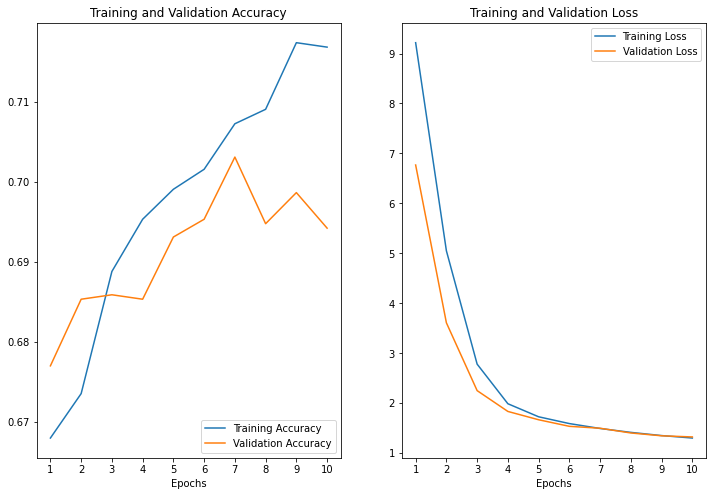

Top 1 accuracy : 0.6942
Top 2 accuracy : 0.8463
Top 3 accuracy : 0.9251
Top 4 accuracy : 0.9606
Top 5 accuracy : 0.9795
Found 1005 images belonging to 7 classes.
Accuracy Score :  0.7234
precision      0.364900
recall         0.282214
specificity    0.876271
f1-score       0.259900
dtype: float64 

==> KFOLD : 2 

Found 7208 non-validated image filenames belonging to 7 classes.
Found 1802 non-validated image filenames belonging to 7 classes.
Epoch 1/10
113/113 [==============================] - 92s 808ms/step - loss: 9.3385 - accuracy: 0.6688 - val_loss: 7.0292 - val_accuracy: 0.6709
Epoch 2/10
113/113 [==============================] - 92s 817ms/step - loss: 5.3396 - accuracy: 0.6804 - val_loss: 3.9562 - val_accuracy: 0.6792
Epoch 3/10
113/113 [==============================] - 94s 831ms/step - loss: 3.0915 - accuracy: 0.6874 - val_loss: 2.4822 - val_accuracy: 0.6903
Epoch 4/10
113/113 [==============================] - 92s 815ms/step - loss: 2.1764 - accuracy: 0.6966 - val_loss: 1.99

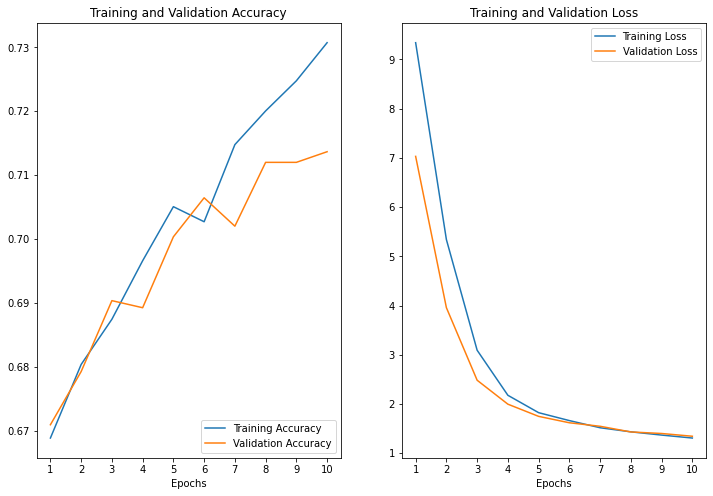

Top 1 accuracy : 0.7137
Top 2 accuracy : 0.8657
Top 3 accuracy : 0.9362
Top 4 accuracy : 0.9706
Top 5 accuracy : 0.9872
Found 1005 images belonging to 7 classes.
Accuracy Score :  0.7353
precision      0.461743
recall         0.296900
specificity    0.880529
f1-score       0.286271
dtype: float64 

==> KFOLD : 3 

Found 7208 non-validated image filenames belonging to 7 classes.
Found 1802 non-validated image filenames belonging to 7 classes.
Epoch 1/10
113/113 [==============================] - 93s 822ms/step - loss: 9.4162 - accuracy: 0.6648 - val_loss: 7.2161 - val_accuracy: 0.6670
Epoch 2/10
113/113 [==============================] - 91s 807ms/step - loss: 5.6460 - accuracy: 0.6790 - val_loss: 4.3028 - val_accuracy: 0.6865
Epoch 3/10
113/113 [==============================] - 90s 797ms/step - loss: 3.5360 - accuracy: 0.6873 - val_loss: 2.9564 - val_accuracy: 0.6942
Epoch 4/10
113/113 [==============================] - 91s 810ms/step - loss: 2.6734 - accuracy: 0.6899 - val_loss: 2.42

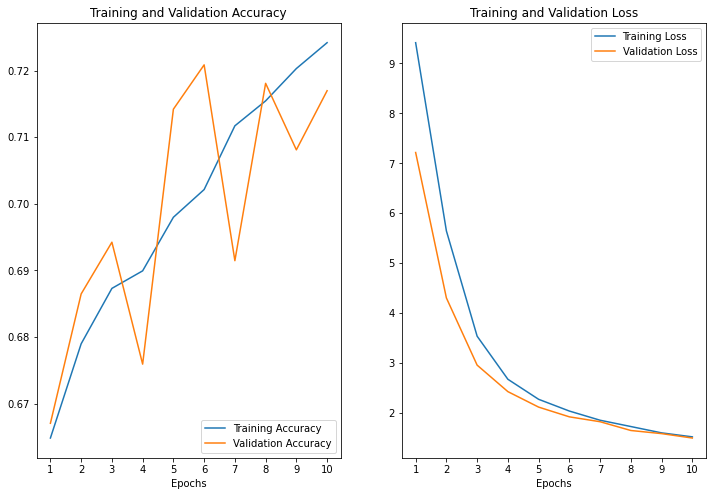

Top 1 accuracy : 0.717
Top 2 accuracy : 0.8674
Top 3 accuracy : 0.9351
Top 4 accuracy : 0.9639
Top 5 accuracy : 0.985
Found 1005 images belonging to 7 classes.
Accuracy Score :  0.7234
precision      0.405143
recall         0.260586
specificity    0.876829
f1-score       0.283000
dtype: float64 

==> KFOLD : 4 

Found 7208 non-validated image filenames belonging to 7 classes.
Found 1802 non-validated image filenames belonging to 7 classes.
Epoch 1/10
113/113 [==============================] - 94s 828ms/step - loss: 9.4267 - accuracy: 0.6644 - val_loss: 7.0952 - val_accuracy: 0.6687
Epoch 2/10
113/113 [==============================] - 94s 833ms/step - loss: 5.4845 - accuracy: 0.6751 - val_loss: 4.0928 - val_accuracy: 0.6920
Epoch 3/10
113/113 [==============================] - 94s 829ms/step - loss: 3.2736 - accuracy: 0.6851 - val_loss: 2.6770 - val_accuracy: 0.6915
Epoch 4/10
113/113 [==============================] - 93s 820ms/step - loss: 2.3913 - accuracy: 0.6920 - val_loss: 2.1635

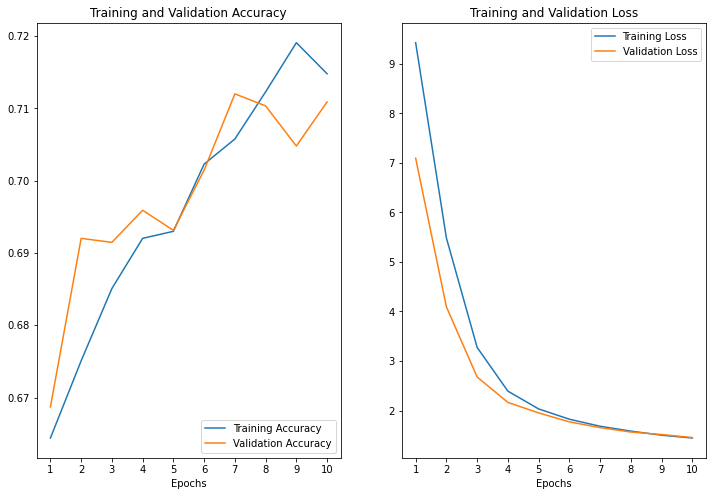

Top 1 accuracy : 0.7109
Top 2 accuracy : 0.864
Top 3 accuracy : 0.9351
Top 4 accuracy : 0.97
Top 5 accuracy : 0.9867
Found 1005 images belonging to 7 classes.
Accuracy Score :  0.7204
precision      0.338586
recall         0.255314
specificity    0.875414
f1-score       0.254671
dtype: float64 

==> KFOLD : 5 

Found 7208 non-validated image filenames belonging to 7 classes.
Found 1802 non-validated image filenames belonging to 7 classes.
Epoch 1/10
113/113 [==============================] - 95s 834ms/step - loss: 9.2747 - accuracy: 0.6643 - val_loss: 6.9761 - val_accuracy: 0.6698
Epoch 2/10
113/113 [==============================] - 95s 841ms/step - loss: 5.3251 - accuracy: 0.6820 - val_loss: 3.9880 - val_accuracy: 0.6765
Epoch 3/10
113/113 [==============================] - 93s 827ms/step - loss: 3.1268 - accuracy: 0.6941 - val_loss: 2.5490 - val_accuracy: 0.6859
Epoch 4/10
113/113 [==============================] - 94s 829ms/step - loss: 2.2423 - accuracy: 0.7019 - val_loss: 2.0522 

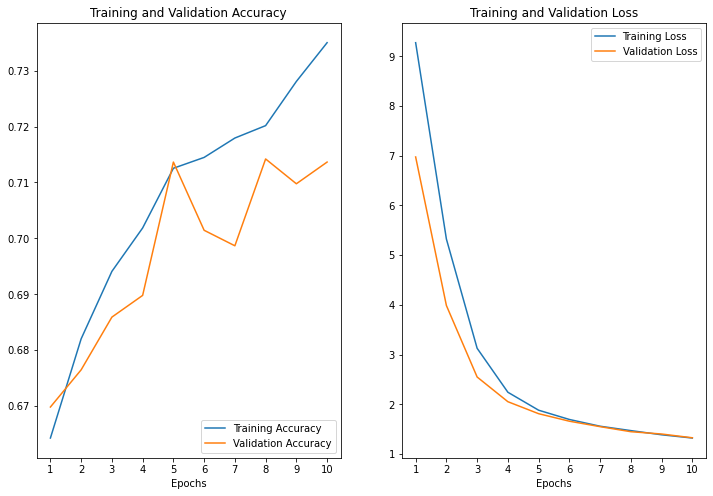

Top 1 accuracy : 0.7137
Top 2 accuracy : 0.8718
Top 3 accuracy : 0.9467
Top 4 accuracy : 0.9717
Top 5 accuracy : 0.9867
Found 1005 images belonging to 7 classes.
Accuracy Score :  0.7473
precision      0.424071
recall         0.309043
specificity    0.887900
f1-score       0.298900
dtype: float64 


 === KFOLD AVERAGE STATISTICS === 
loss: 1.3445821046829223 - accuracy: 0.728967797756195 - val_loss: 1.3888733386993408 - val_accuracy: 0.7098779082298279
Time Elapsed :  1:22:32.567720


In [7]:
augment = "original"
execute_kfold(augmentations_data_paths[augment], augment)

==> KFOLD : 1 

Found 15330 non-validated image filenames belonging to 7 classes.
Found 3833 non-validated image filenames belonging to 7 classes.
Epoch 1/10
240/240 [==============================] - 219s 910ms/step - loss: 7.7058 - accuracy: 0.3760 - val_loss: 4.1750 - val_accuracy: 0.5067
Epoch 2/10
240/240 [==============================] - 196s 817ms/step - loss: 3.0879 - accuracy: 0.5482 - val_loss: 2.6168 - val_accuracy: 0.5442
Epoch 3/10
240/240 [==============================] - 196s 818ms/step - loss: 2.3970 - accuracy: 0.6020 - val_loss: 2.2241 - val_accuracy: 0.6363
Epoch 4/10
240/240 [==============================] - 196s 816ms/step - loss: 2.1282 - accuracy: 0.6275 - val_loss: 2.0389 - val_accuracy: 0.6209
Epoch 5/10
240/240 [==============================] - 194s 809ms/step - loss: 1.9414 - accuracy: 0.6488 - val_loss: 1.8707 - val_accuracy: 0.6582
Epoch 6/10
240/240 [==============================] - 190s 791ms/step - loss: 1.8013 - accuracy: 0.6628 - val_loss: 1.7285 

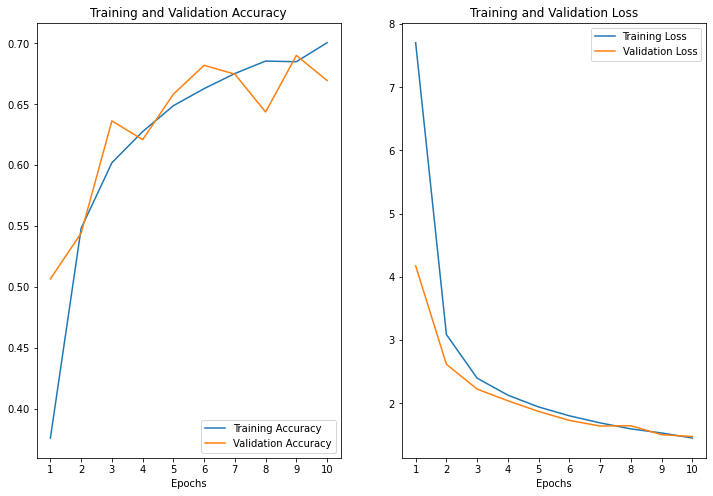

Top 1 accuracy : 0.6694
Top 2 accuracy : 0.8544
Top 3 accuracy : 0.9311
Top 4 accuracy : 0.9721
Top 5 accuracy : 0.994
Found 1005 images belonging to 7 classes.
Accuracy Score :  0.7632
precision      0.490543
recall         0.451071
specificity    0.917300
f1-score       0.433214
dtype: float64 

==> KFOLD : 2 

Found 15330 non-validated image filenames belonging to 7 classes.
Found 3833 non-validated image filenames belonging to 7 classes.
Epoch 1/10
240/240 [==============================] - 198s 824ms/step - loss: 7.8210 - accuracy: 0.3981 - val_loss: 4.5014 - val_accuracy: 0.4813
Epoch 2/10
240/240 [==============================] - 198s 826ms/step - loss: 3.3764 - accuracy: 0.5547 - val_loss: 2.8563 - val_accuracy: 0.5742
Epoch 3/10
240/240 [==============================] - 198s 825ms/step - loss: 2.6215 - accuracy: 0.5856 - val_loss: 2.3991 - val_accuracy: 0.6220
Epoch 4/10
240/240 [==============================] - 198s 825ms/step - loss: 2.2749 - accuracy: 0.6138 - val_loss: 

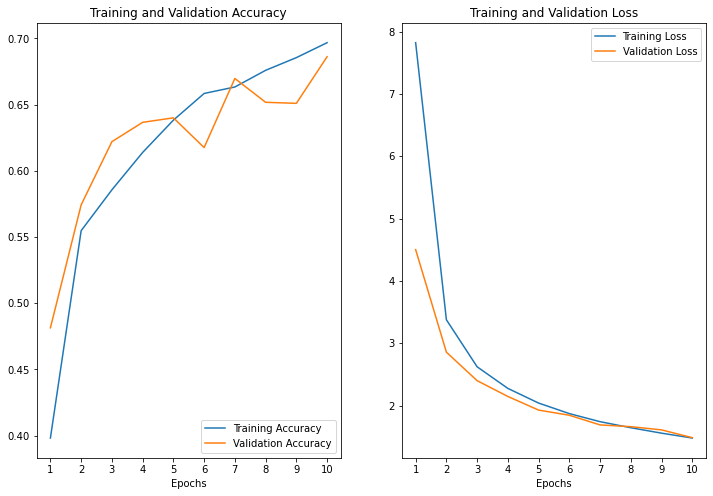

Top 1 accuracy : 0.6861
Top 2 accuracy : 0.8646
Top 3 accuracy : 0.9358
Top 4 accuracy : 0.9708
Top 5 accuracy : 0.9901
Found 1005 images belonging to 7 classes.
Accuracy Score :  0.7831
precision      0.511657
recall         0.432600
specificity    0.925114
f1-score       0.423071
dtype: float64 

==> KFOLD : 3 

Found 15330 non-validated image filenames belonging to 7 classes.
Found 3833 non-validated image filenames belonging to 7 classes.
Epoch 1/10
240/240 [==============================] - 191s 795ms/step - loss: 8.0057 - accuracy: 0.3725 - val_loss: 4.5738 - val_accuracy: 0.5020
Epoch 2/10
240/240 [==============================] - 191s 797ms/step - loss: 3.4106 - accuracy: 0.5412 - val_loss: 2.7844 - val_accuracy: 0.5494
Epoch 3/10
240/240 [==============================] - 191s 798ms/step - loss: 2.4851 - accuracy: 0.6115 - val_loss: 2.3046 - val_accuracy: 0.6131
Epoch 4/10
240/240 [==============================] - 191s 797ms/step - loss: 2.1334 - accuracy: 0.6419 - val_loss:

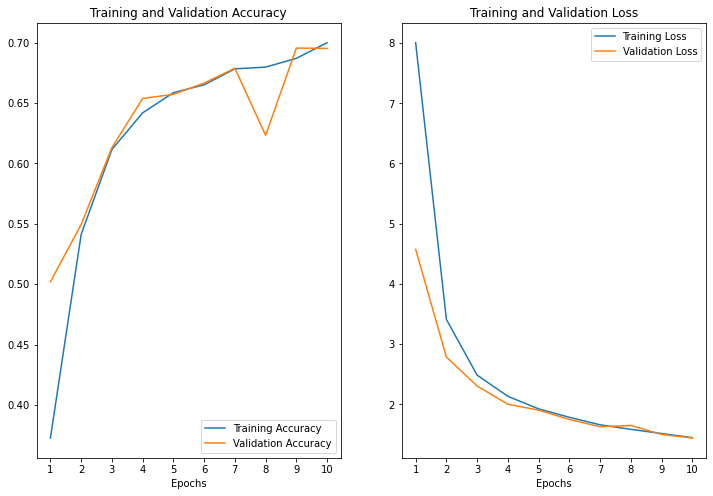

Top 1 accuracy : 0.6953
Top 2 accuracy : 0.8662
Top 3 accuracy : 0.9403
Top 4 accuracy : 0.9708
Top 5 accuracy : 0.9917
Found 1005 images belonging to 7 classes.
Accuracy Score :  0.7493
precision      0.488329
recall         0.384100
specificity    0.890129
f1-score       0.397571
dtype: float64 

==> KFOLD : 4 

Found 15331 non-validated image filenames belonging to 7 classes.
Found 3832 non-validated image filenames belonging to 7 classes.
Epoch 1/10
240/240 [==============================] - 194s 806ms/step - loss: 7.8858 - accuracy: 0.4263 - val_loss: 4.6190 - val_accuracy: 0.5551
Epoch 2/10
240/240 [==============================] - 199s 829ms/step - loss: 3.6183 - accuracy: 0.5852 - val_loss: 3.0797 - val_accuracy: 0.5984
Epoch 3/10
240/240 [==============================] - 197s 822ms/step - loss: 2.7863 - accuracy: 0.6274 - val_loss: 2.6010 - val_accuracy: 0.6318
Epoch 4/10
240/240 [==============================] - 199s 827ms/step - loss: 2.3942 - accuracy: 0.6517 - val_loss:

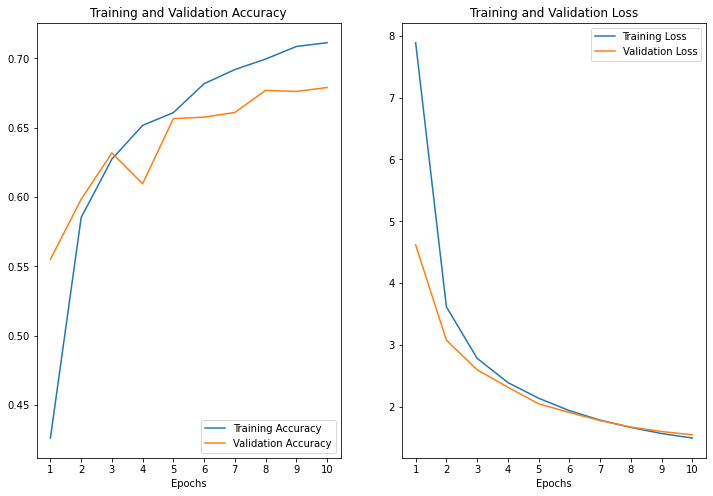

Top 1 accuracy : 0.679
Top 2 accuracy : 0.8536
Top 3 accuracy : 0.9319
Top 4 accuracy : 0.9687
Top 5 accuracy : 0.9893
Found 1005 images belonging to 7 classes.
Accuracy Score :  0.7582
precision      0.513271
recall         0.436071
specificity    0.904986
f1-score       0.413529
dtype: float64 

==> KFOLD : 5 

Found 15331 non-validated image filenames belonging to 7 classes.
Found 3832 non-validated image filenames belonging to 7 classes.
Epoch 1/10
240/240 [==============================] - 199s 827ms/step - loss: 7.8553 - accuracy: 0.3621 - val_loss: 4.3591 - val_accuracy: 0.4666
Epoch 2/10
240/240 [==============================] - 198s 823ms/step - loss: 3.2172 - accuracy: 0.5200 - val_loss: 2.6439 - val_accuracy: 0.5564
Epoch 3/10
240/240 [==============================] - 198s 825ms/step - loss: 2.4602 - accuracy: 0.5763 - val_loss: 2.2949 - val_accuracy: 0.5913
Epoch 4/10
240/240 [==============================] - 206s 858ms/step - loss: 2.1890 - accuracy: 0.6094 - val_loss: 

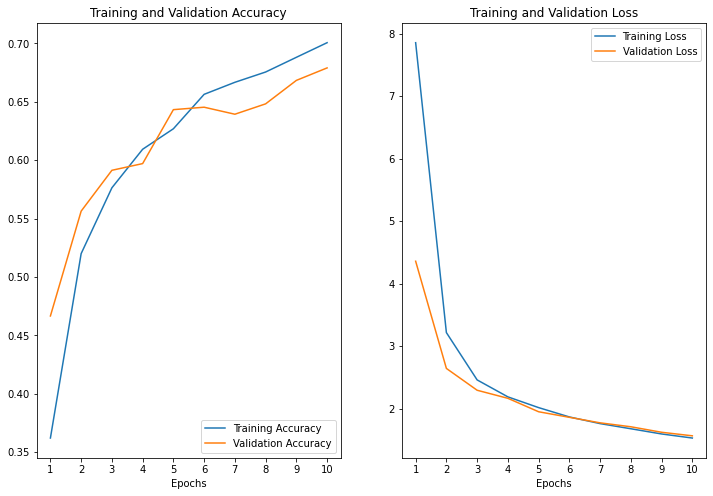

Top 1 accuracy : 0.679
Top 2 accuracy : 0.8471
Top 3 accuracy : 0.923
Top 4 accuracy : 0.9653
Top 5 accuracy : 0.9898
Found 1005 images belonging to 7 classes.
Accuracy Score :  0.7642
precision      0.505886
recall         0.410586
specificity    0.910729
f1-score       0.410200
dtype: float64 


 === KFOLD AVERAGE STATISTICS === 
loss: 1.4413005113601685 - accuracy: 0.708552622795105 - val_loss: 1.5031003952026367 - val_accuracy: 0.68178231716156
Time Elapsed :  2:54:14.975519


In [60]:
augment = "rotation"
execute_kfold(augmentations_data_paths[augment], augment)

==> KFOLD : 1 

Found 15330 non-validated image filenames belonging to 7 classes.
Found 3833 non-validated image filenames belonging to 7 classes.
Epoch 1/10
240/240 [==============================] - 209s 871ms/step - loss: 7.6966 - accuracy: 0.4190 - val_loss: 4.3938 - val_accuracy: 0.4855
Epoch 2/10
240/240 [==============================] - 191s 796ms/step - loss: 3.2330 - accuracy: 0.5354 - val_loss: 2.7096 - val_accuracy: 0.5450
Epoch 3/10
240/240 [==============================] - 191s 797ms/step - loss: 2.4425 - accuracy: 0.5594 - val_loss: 2.2536 - val_accuracy: 0.5867
Epoch 4/10
240/240 [==============================] - 191s 795ms/step - loss: 2.1119 - accuracy: 0.5823 - val_loss: 2.0085 - val_accuracy: 0.6006
Epoch 5/10
240/240 [==============================] - 190s 792ms/step - loss: 1.8766 - accuracy: 0.6211 - val_loss: 1.8452 - val_accuracy: 0.6042
Epoch 6/10
240/240 [==============================] - 190s 791ms/step - loss: 1.7057 - accuracy: 0.6489 - val_loss: 1.6962 

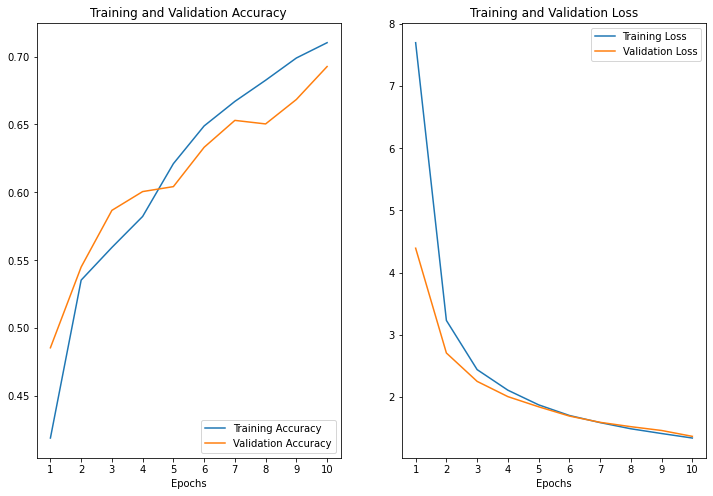

Top 1 accuracy : 0.6927
Top 2 accuracy : 0.8709
Top 3 accuracy : 0.9431
Top 4 accuracy : 0.9765
Top 5 accuracy : 0.9948
Found 1005 images belonging to 7 classes.
Accuracy Score :  0.6517
precision      0.341186
recall         0.283500
specificity    0.855143
f1-score       0.275886
dtype: float64 

==> KFOLD : 2 

Found 15330 non-validated image filenames belonging to 7 classes.
Found 3833 non-validated image filenames belonging to 7 classes.
Epoch 1/10
240/240 [==============================] - 190s 790ms/step - loss: 7.4303 - accuracy: 0.3853 - val_loss: 3.7597 - val_accuracy: 0.5020
Epoch 2/10
240/240 [==============================] - 190s 791ms/step - loss: 2.6777 - accuracy: 0.5215 - val_loss: 2.1509 - val_accuracy: 0.5552
Epoch 3/10
240/240 [==============================] - 190s 792ms/step - loss: 2.0089 - accuracy: 0.5539 - val_loss: 1.8777 - val_accuracy: 0.5721
Epoch 4/10
240/240 [==============================] - 190s 792ms/step - loss: 1.7854 - accuracy: 0.5843 - val_loss:

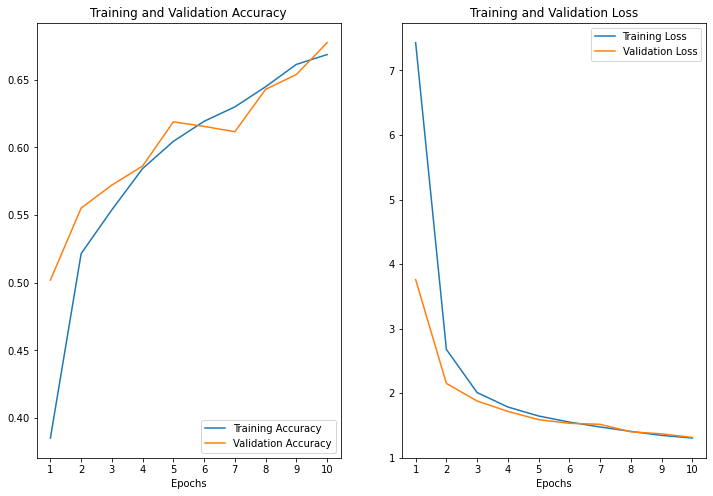

Top 1 accuracy : 0.6773
Top 2 accuracy : 0.8469
Top 3 accuracy : 0.9264
Top 4 accuracy : 0.9656
Top 5 accuracy : 0.9851
Found 1005 images belonging to 7 classes.
Accuracy Score :  0.6677
precision      0.318714
recall         0.295186
specificity    0.860857
f1-score       0.272857
dtype: float64 

==> KFOLD : 3 

Found 15330 non-validated image filenames belonging to 7 classes.
Found 3833 non-validated image filenames belonging to 7 classes.
Epoch 1/10
240/240 [==============================] - 192s 798ms/step - loss: 7.8089 - accuracy: 0.4543 - val_loss: 4.5689 - val_accuracy: 0.5515
Epoch 2/10
240/240 [==============================] - 208s 868ms/step - loss: 3.3415 - accuracy: 0.5871 - val_loss: 2.7059 - val_accuracy: 0.5807
Epoch 3/10
240/240 [==============================] - 209s 869ms/step - loss: 2.3734 - accuracy: 0.6127 - val_loss: 2.1492 - val_accuracy: 0.6246
Epoch 4/10
240/240 [==============================] - 209s 872ms/step - loss: 2.0043 - accuracy: 0.6352 - val_loss:

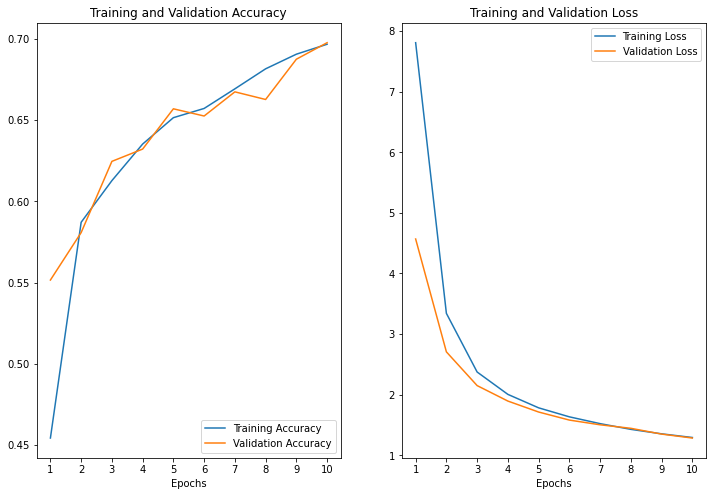

Top 1 accuracy : 0.6976
Top 2 accuracy : 0.8706
Top 3 accuracy : 0.9478
Top 4 accuracy : 0.9799
Top 5 accuracy : 0.9924
Found 1005 images belonging to 7 classes.
Accuracy Score :  0.6478
precision      0.378000
recall         0.337471
specificity    0.860557
f1-score       0.315286
dtype: float64 

==> KFOLD : 4 

Found 15331 non-validated image filenames belonging to 7 classes.
Found 3832 non-validated image filenames belonging to 7 classes.
Epoch 1/10
240/240 [==============================] - 208s 865ms/step - loss: 7.9487 - accuracy: 0.4428 - val_loss: 4.8483 - val_accuracy: 0.5279
Epoch 2/10
240/240 [==============================] - 208s 867ms/step - loss: 3.7451 - accuracy: 0.5789 - val_loss: 3.1228 - val_accuracy: 0.5994
Epoch 3/10
240/240 [==============================] - 207s 862ms/step - loss: 2.8247 - accuracy: 0.6087 - val_loss: 2.6228 - val_accuracy: 0.6005
Epoch 4/10
240/240 [==============================] - 208s 866ms/step - loss: 2.3923 - accuracy: 0.6356 - val_loss:

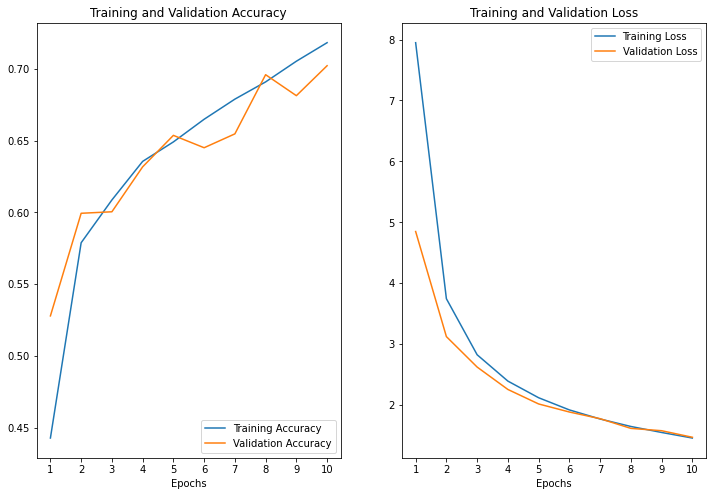

Top 1 accuracy : 0.7022
Top 2 accuracy : 0.8727
Top 3 accuracy : 0.9415
Top 4 accuracy : 0.9742
Top 5 accuracy : 0.993
Found 1005 images belonging to 7 classes.
Accuracy Score :  0.6607
precision      0.353100
recall         0.325357
specificity    0.860257
f1-score       0.299871
dtype: float64 

==> KFOLD : 5 

Found 15331 non-validated image filenames belonging to 7 classes.
Found 3832 non-validated image filenames belonging to 7 classes.
Epoch 1/10
240/240 [==============================] - 208s 865ms/step - loss: 7.5947 - accuracy: 0.4070 - val_loss: 4.1148 - val_accuracy: 0.5269
Epoch 2/10
240/240 [==============================] - 208s 865ms/step - loss: 3.0383 - accuracy: 0.5503 - val_loss: 2.5442 - val_accuracy: 0.5449
Epoch 3/10
240/240 [==============================] - 208s 866ms/step - loss: 2.2804 - accuracy: 0.5859 - val_loss: 2.1313 - val_accuracy: 0.5838
Epoch 4/10
240/240 [==============================] - 208s 865ms/step - loss: 1.9990 - accuracy: 0.6064 - val_loss: 

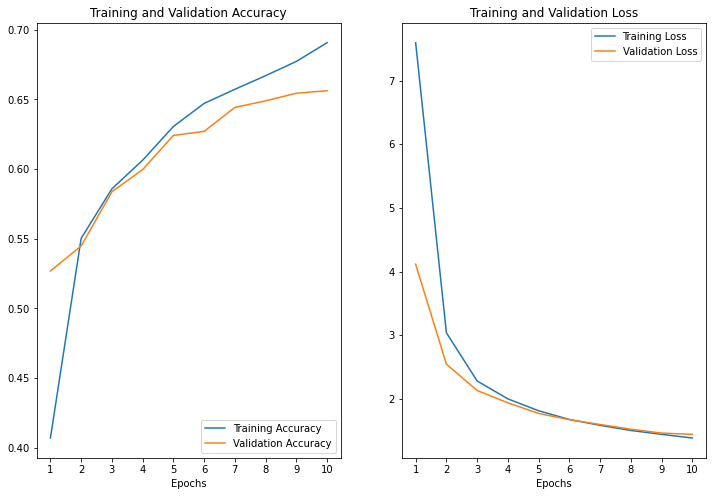

Top 1 accuracy : 0.6563
Top 2 accuracy : 0.8416
Top 3 accuracy : 0.928
Top 4 accuracy : 0.9674
Top 5 accuracy : 0.9893
Found 1005 images belonging to 7 classes.
Accuracy Score :  0.6677
precision      0.399286
recall         0.374143
specificity    0.874243
f1-score       0.345257
dtype: float64 


 === KFOLD AVERAGE STATISTICS === 
loss: 1.3095417022705078 - accuracy: 0.7134712338447571 - val_loss: 1.3759329319000244 - val_accuracy: 0.6852261304855347
Time Elapsed :  2:57:55.202987


In [86]:
augment = "crop+flip"
execute_kfold(augmentations_data_paths[augment], augment)

==> KFOLD : 1 

Found 15330 non-validated image filenames belonging to 7 classes.
Found 3833 non-validated image filenames belonging to 7 classes.
Epoch 1/10
240/240 [==============================] - 224s 930ms/step - loss: 7.7576 - accuracy: 0.3407 - val_loss: 4.2700 - val_accuracy: 0.4404
Epoch 2/10
240/240 [==============================] - 210s 874ms/step - loss: 3.1012 - accuracy: 0.4978 - val_loss: 2.5364 - val_accuracy: 0.5327
Epoch 3/10
240/240 [==============================] - 210s 877ms/step - loss: 2.3205 - accuracy: 0.5411 - val_loss: 2.1663 - val_accuracy: 0.5547
Epoch 4/10
240/240 [==============================] - 210s 876ms/step - loss: 2.0696 - accuracy: 0.5622 - val_loss: 2.0002 - val_accuracy: 0.5693
Epoch 5/10
240/240 [==============================] - 209s 873ms/step - loss: 1.9045 - accuracy: 0.5823 - val_loss: 1.8491 - val_accuracy: 0.5938
Epoch 6/10
240/240 [==============================] - 208s 867ms/step - loss: 1.7880 - accuracy: 0.6002 - val_loss: 1.7632 

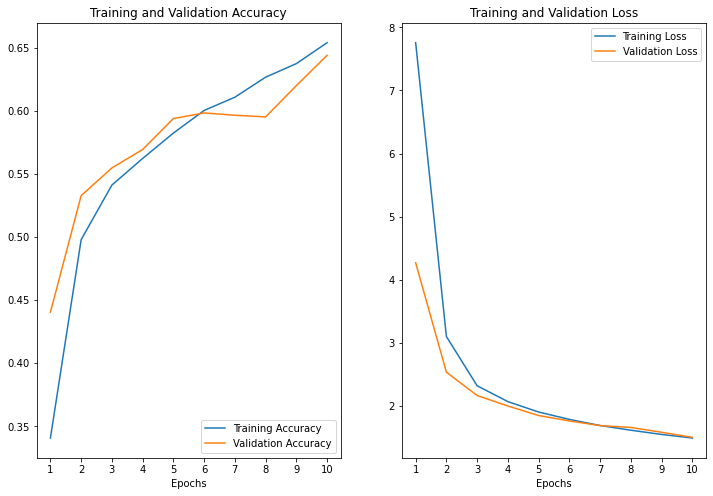

Top 1 accuracy : 0.6439
Top 2 accuracy : 0.8302
Top 3 accuracy : 0.9142
Top 4 accuracy : 0.963
Top 5 accuracy : 0.9862
Found 1005 images belonging to 7 classes.
Accuracy Score :  0.6488
precision      0.387686
recall         0.461029
specificity    0.882086
f1-score       0.365029
dtype: float64 

==> KFOLD : 2 

Found 15330 non-validated image filenames belonging to 7 classes.
Found 3833 non-validated image filenames belonging to 7 classes.
Epoch 1/10
240/240 [==============================] - 204s 850ms/step - loss: 8.3041 - accuracy: 0.4001 - val_loss: 5.3238 - val_accuracy: 0.4806
Epoch 2/10
240/240 [==============================] - 204s 848ms/step - loss: 4.1747 - accuracy: 0.5240 - val_loss: 3.4911 - val_accuracy: 0.5372
Epoch 3/10
240/240 [==============================] - 203s 846ms/step - loss: 3.1569 - accuracy: 0.5588 - val_loss: 2.9080 - val_accuracy: 0.5601
Epoch 4/10
240/240 [==============================] - 204s 848ms/step - loss: 2.6774 - accuracy: 0.5800 - val_loss: 

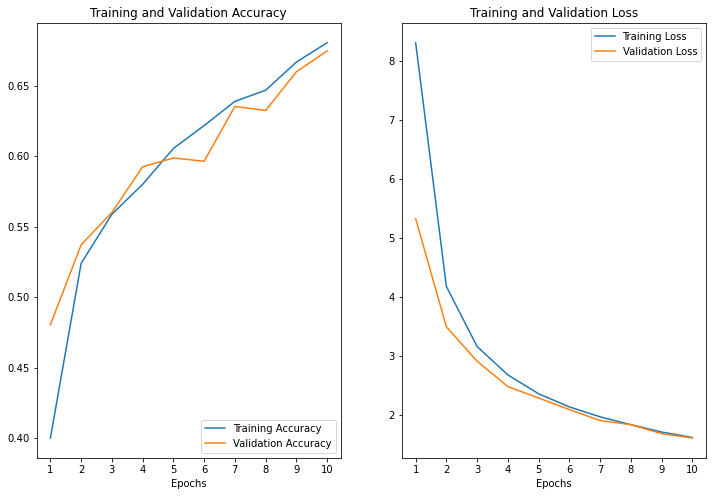

Top 1 accuracy : 0.6747
Top 2 accuracy : 0.8458
Top 3 accuracy : 0.9298
Top 4 accuracy : 0.9726
Top 5 accuracy : 0.9914
Found 1005 images belonging to 7 classes.
Accuracy Score :  0.6856
precision      0.432643
recall         0.446943
specificity    0.887386
f1-score       0.384043
dtype: float64 

==> KFOLD : 3 

Found 15330 non-validated image filenames belonging to 7 classes.
Found 3833 non-validated image filenames belonging to 7 classes.
Epoch 1/10
240/240 [==============================] - 206s 855ms/step - loss: 7.7143 - accuracy: 0.4066 - val_loss: 4.3338 - val_accuracy: 0.5069
Epoch 2/10
240/240 [==============================] - 206s 858ms/step - loss: 3.1944 - accuracy: 0.5372 - val_loss: 2.5602 - val_accuracy: 0.5792
Epoch 3/10
240/240 [==============================] - 204s 849ms/step - loss: 2.3549 - accuracy: 0.5715 - val_loss: 2.1592 - val_accuracy: 0.5961
Epoch 4/10
240/240 [==============================] - 200s 833ms/step - loss: 2.0428 - accuracy: 0.5967 - val_loss:

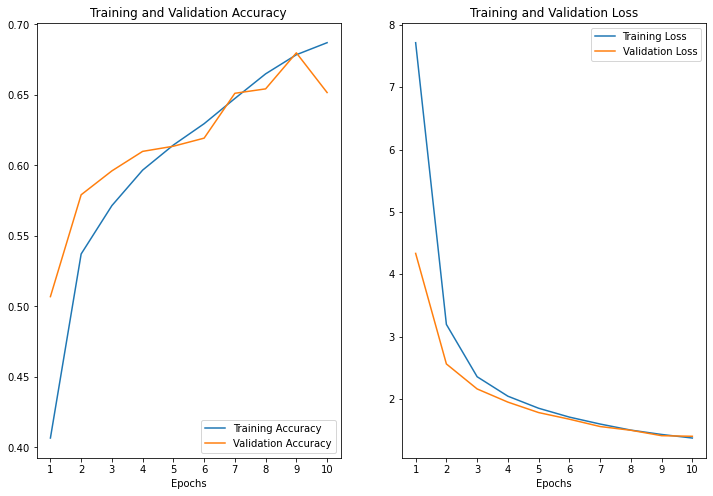

Top 1 accuracy : 0.6517
Top 2 accuracy : 0.8529
Top 3 accuracy : 0.9314
Top 4 accuracy : 0.9757
Top 5 accuracy : 0.9922
Found 1005 images belonging to 7 classes.
Accuracy Score :  0.6736
precision      0.415400
recall         0.464471
specificity    0.889514
f1-score       0.370400
dtype: float64 

==> KFOLD : 4 

Found 15331 non-validated image filenames belonging to 7 classes.
Found 3832 non-validated image filenames belonging to 7 classes.
Epoch 1/10
240/240 [==============================] - 207s 859ms/step - loss: 7.8335 - accuracy: 0.3659 - val_loss: 4.4235 - val_accuracy: 0.4966
Epoch 2/10
240/240 [==============================] - 205s 853ms/step - loss: 3.3376 - accuracy: 0.5026 - val_loss: 2.7402 - val_accuracy: 0.5459
Epoch 3/10
240/240 [==============================] - 207s 863ms/step - loss: 2.5139 - accuracy: 0.5431 - val_loss: 2.3308 - val_accuracy: 0.5519
Epoch 4/10
240/240 [==============================] - 202s 843ms/step - loss: 2.2075 - accuracy: 0.5738 - val_loss:

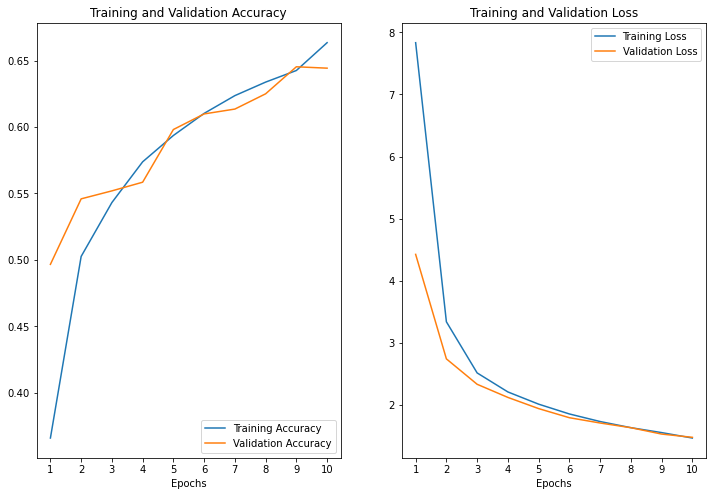

Top 1 accuracy : 0.6443
Top 2 accuracy : 0.8377
Top 3 accuracy : 0.9222
Top 4 accuracy : 0.9679
Top 5 accuracy : 0.9906
Found 1005 images belonging to 7 classes.
Accuracy Score :  0.6577
precision      0.375643
recall         0.434714
specificity    0.883986
f1-score       0.353471
dtype: float64 

==> KFOLD : 5 

Found 15331 non-validated image filenames belonging to 7 classes.
Found 3832 non-validated image filenames belonging to 7 classes.
Epoch 1/10
240/240 [==============================] - 217s 905ms/step - loss: 7.9594 - accuracy: 0.3635 - val_loss: 4.7220 - val_accuracy: 0.4564
Epoch 2/10
240/240 [==============================] - 217s 905ms/step - loss: 3.6072 - accuracy: 0.5039 - val_loss: 3.0315 - val_accuracy: 0.5107
Epoch 3/10
240/240 [==============================] - 216s 900ms/step - loss: 2.7540 - accuracy: 0.5351 - val_loss: 2.5805 - val_accuracy: 0.5334
Epoch 4/10
240/240 [==============================] - 217s 902ms/step - loss: 2.4036 - accuracy: 0.5615 - val_loss:

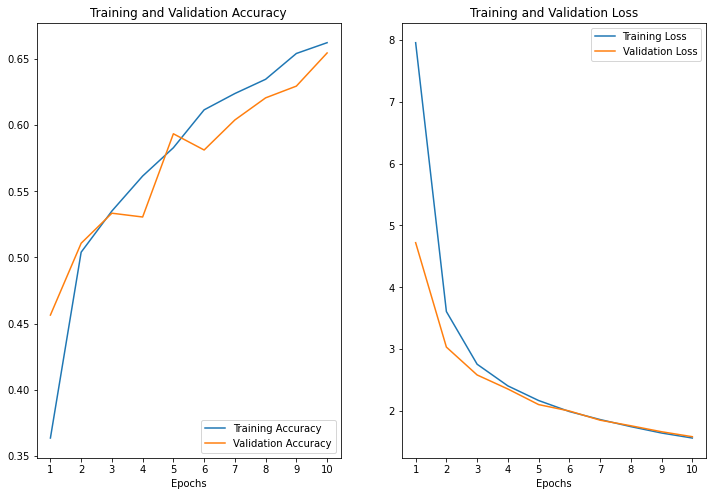

Top 1 accuracy : 0.6545
Top 2 accuracy : 0.8319
Top 3 accuracy : 0.9207
Top 4 accuracy : 0.9674
Top 5 accuracy : 0.9864
Found 1005 images belonging to 7 classes.
Accuracy Score :  0.6438
precision      0.365771
recall         0.416414
specificity    0.870786
f1-score       0.338657
dtype: float64 


 === KFOLD AVERAGE STATISTICS === 
loss: 1.4525827884674072 - accuracy: 0.6834524631500244 - val_loss: 1.5139087200164796 - val_accuracy: 0.6538115739822388
Time Elapsed :  3:03:12.384216


In [87]:
augment = "zoom"
execute_kfold(augmentations_data_paths[augment], augment)

==> KFOLD : 1 

Found 15330 non-validated image filenames belonging to 7 classes.
Found 3833 non-validated image filenames belonging to 7 classes.
Epoch 1/10
240/240 [==============================] - 230s 958ms/step - loss: 7.6046 - accuracy: 0.5042 - val_loss: 4.3539 - val_accuracy: 0.5427
Epoch 2/10
240/240 [==============================] - 213s 886ms/step - loss: 3.1726 - accuracy: 0.6087 - val_loss: 2.6269 - val_accuracy: 0.5896
Epoch 3/10
240/240 [==============================] - 211s 878ms/step - loss: 2.2978 - accuracy: 0.6431 - val_loss: 2.1042 - val_accuracy: 0.6520
Epoch 4/10
240/240 [==============================] - 207s 864ms/step - loss: 1.9426 - accuracy: 0.6716 - val_loss: 1.8373 - val_accuracy: 0.6606
Epoch 5/10
240/240 [==============================] - 206s 858ms/step - loss: 1.7220 - accuracy: 0.6855 - val_loss: 1.6854 - val_accuracy: 0.6653
Epoch 6/10
240/240 [==============================] - 207s 861ms/step - loss: 1.5618 - accuracy: 0.7021 - val_loss: 1.5273 

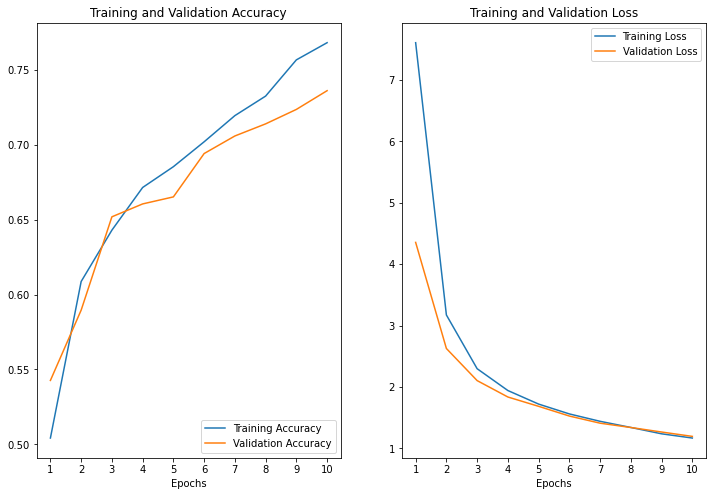

Top 1 accuracy : 0.7362
Top 2 accuracy : 0.9095
Top 3 accuracy : 0.9669
Top 4 accuracy : 0.9885
Top 5 accuracy : 0.9982
Found 1005 images belonging to 7 classes.
Accuracy Score :  0.6637
precision      0.095771
recall         0.142000
specificity    0.855029
f1-score       0.114386
dtype: float64 

==> KFOLD : 2 

Found 15330 non-validated image filenames belonging to 7 classes.
Found 3833 non-validated image filenames belonging to 7 classes.
Epoch 1/10
240/240 [==============================] - 216s 897ms/step - loss: 7.5266 - accuracy: 0.5164 - val_loss: 4.2661 - val_accuracy: 0.5860
Epoch 2/10
240/240 [==============================] - 210s 876ms/step - loss: 3.1084 - accuracy: 0.6122 - val_loss: 2.5111 - val_accuracy: 0.6144
Epoch 3/10
240/240 [==============================] - 210s 876ms/step - loss: 2.2297 - accuracy: 0.6412 - val_loss: 2.0286 - val_accuracy: 0.6559
Epoch 4/10
240/240 [==============================] - 211s 881ms/step - loss: 1.8878 - accuracy: 0.6706 - val_loss:

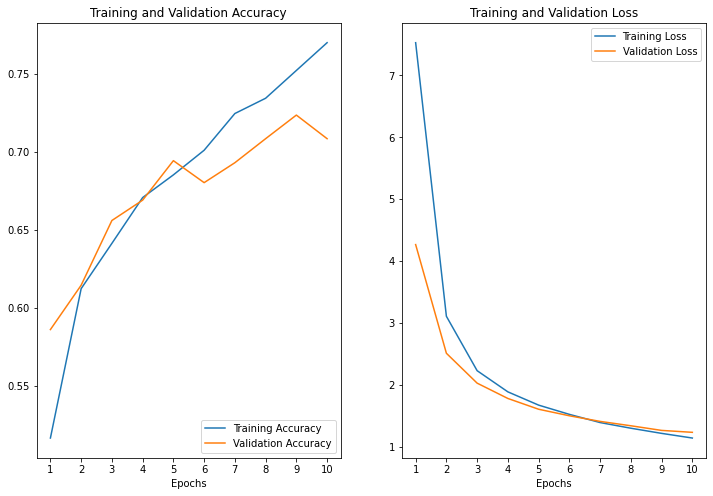

Top 1 accuracy : 0.7083
Top 2 accuracy : 0.8959
Top 3 accuracy : 0.9637
Top 4 accuracy : 0.9857
Top 5 accuracy : 0.9982
Found 1005 images belonging to 7 classes.
Accuracy Score :  0.6667
precision      0.095900
recall         0.142643
specificity    0.855671
f1-score       0.114700
dtype: float64 

==> KFOLD : 3 

Found 15330 non-validated image filenames belonging to 7 classes.
Found 3833 non-validated image filenames belonging to 7 classes.
Epoch 1/10
240/240 [==============================] - 204s 846ms/step - loss: 7.9631 - accuracy: 0.5027 - val_loss: 4.8509 - val_accuracy: 0.5766
Epoch 2/10
240/240 [==============================] - 200s 834ms/step - loss: 3.6687 - accuracy: 0.6111 - val_loss: 3.0227 - val_accuracy: 0.5998
Epoch 3/10
240/240 [==============================] - 204s 850ms/step - loss: 2.6587 - accuracy: 0.6454 - val_loss: 2.4191 - val_accuracy: 0.6327
Epoch 4/10
240/240 [==============================] - 203s 845ms/step - loss: 2.1856 - accuracy: 0.6719 - val_loss:

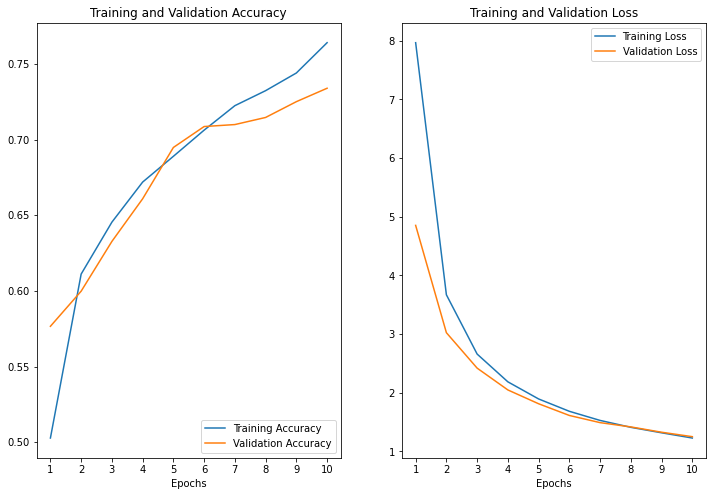

Top 1 accuracy : 0.7339
Top 2 accuracy : 0.9097
Top 3 accuracy : 0.964
Top 4 accuracy : 0.9875
Top 5 accuracy : 0.9982
Found 1005 images belonging to 7 classes.
Accuracy Score :  0.6657
precision      0.095757
recall         0.142429
specificity    0.855657
f1-score       0.114529
dtype: float64 

==> KFOLD : 4 

Found 15331 non-validated image filenames belonging to 7 classes.
Found 3832 non-validated image filenames belonging to 7 classes.
Epoch 1/10
240/240 [==============================] - 220s 916ms/step - loss: 7.5847 - accuracy: 0.5034 - val_loss: 4.3744 - val_accuracy: 0.5752
Epoch 2/10
240/240 [==============================] - 202s 841ms/step - loss: 3.2252 - accuracy: 0.6015 - val_loss: 2.6152 - val_accuracy: 0.6352
Epoch 3/10
240/240 [==============================] - 199s 831ms/step - loss: 2.3866 - accuracy: 0.6433 - val_loss: 2.1975 - val_accuracy: 0.6511
Epoch 4/10
240/240 [==============================] - 199s 828ms/step - loss: 2.0364 - accuracy: 0.6676 - val_loss: 

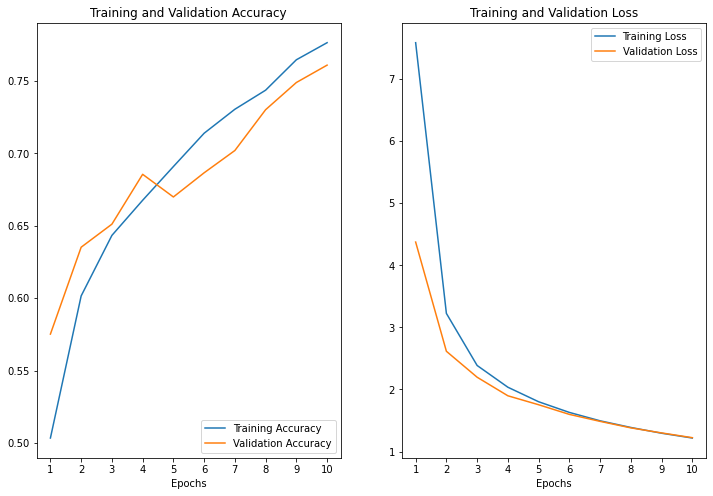

Top 1 accuracy : 0.761
Top 2 accuracy : 0.9225
Top 3 accuracy : 0.9739
Top 4 accuracy : 0.9903
Top 5 accuracy : 0.9987
Found 1005 images belonging to 7 classes.
Accuracy Score :  0.6677
precision      0.095857
recall         0.142857
specificity    0.856086
f1-score       0.114729
dtype: float64 

==> KFOLD : 5 

Found 15331 non-validated image filenames belonging to 7 classes.
Found 3832 non-validated image filenames belonging to 7 classes.
Epoch 1/10
240/240 [==============================] - 198s 823ms/step - loss: 7.9422 - accuracy: 0.5088 - val_loss: 4.7140 - val_accuracy: 0.5772
Epoch 2/10
240/240 [==============================] - 198s 826ms/step - loss: 3.5214 - accuracy: 0.6136 - val_loss: 2.8777 - val_accuracy: 0.6161
Epoch 3/10
240/240 [==============================] - 193s 804ms/step - loss: 2.5492 - accuracy: 0.6445 - val_loss: 2.3481 - val_accuracy: 0.6326
Epoch 4/10
240/240 [==============================] - 202s 842ms/step - loss: 2.1376 - accuracy: 0.6749 - val_loss: 

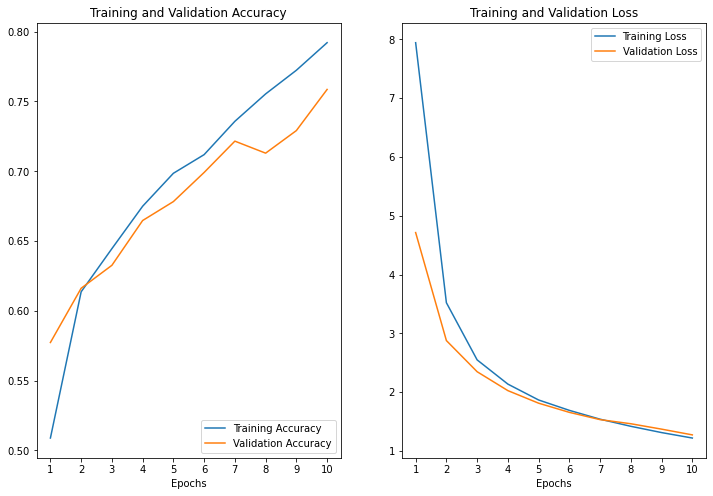

Top 1 accuracy : 0.7586
Top 2 accuracy : 0.9201
Top 3 accuracy : 0.9718
Top 4 accuracy : 0.9916
Top 5 accuracy : 0.9984
Found 1005 images belonging to 7 classes.
Accuracy Score :  0.6637
precision      0.095771
recall         0.142000
specificity    0.855014
f1-score       0.114386
dtype: float64 


 === KFOLD AVERAGE STATISTICS === 
loss: 1.148906397819519 - accuracy: 0.7860583066940308 - val_loss: 1.236054277420044 - val_accuracy: 0.7396044611930848
Time Elapsed :  3:02:43.097814


In [88]:
augment = "color"
execute_kfold(augmentations_data_paths[augment], augment)